Привет! 

Меня зовут Маковеев Кирилл, я буду проверять твой проект ; ) Моя основная цель — не указать на совершенные тобою ошибки, а помочь тебе стать аналитиком данных.

Если тебе комфортно, можешь обращаться ко мне на «ты» - тогда и я буду к тебе так обращаться, но если нет, то обязательно дай знать.

Пожалуйста, не удаляй комментарии, которые я буду оставлять в работе, это особенно поможет, если твои проекты будут отправлены на повторную проверку.

Кстати, ты тоже можешь реагировать на мои комментарии, но в таком случае постарайся, чтобы твои комментарии отличались: например, выделяй их любимым цветом — тогда у нас не возникнет путаницы. 

Набор моих цветов:
<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>
    
Решение на отдельном шаге является полностью правильным. </div>

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡</b> 
    
Решение может стать еще лучше с некоторыми корректировками </div>

<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b> 
    
В случае, если решение какого-то шага требует значительных изменений. Проект не может быть принят с первого раза, если ревью содержит комментарии, помеченные этим цветом </div>

___

# Исследование закономерностей, определяющих успешность игры

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
<br>
<br>
Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Очень хорошо, что ты добавляешь описание и название - это упрощает взаимодействие с проектом для тех, кто с ним ознакамливается.</div>

### Открываем файл с данными и изучаем общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
games = pd.read_csv('/datasets/games.csv')
display(games.head(20))
games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим пропуски в Critic_Score, User_Score, Rating. Пропуски в Critic_Scor заполнять не будем, т.к. любое заполнение исказит результаты корреляционного анализа и стат-тестов. Пропуски NaN в Rating заменим на "no-rating". 
Также нужно поменять тип данных в столбцах год выпуска и оценка пользователей, чтобы избежать ошибок при расчете данных.

### Подготавливаем данные

In [2]:
#приведем столбцы к нижнему регистру
games.columns = games.columns.str.lower()
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
#посмотрим уникальные значения в каждом столбце
for col in games:
    display(games[col].unique())

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

array([4.136e+01, 2.908e+01, 1.568e+01, 1.561e+01, 1.127e+01, 2.320e+01,
       1.128e+01, 1.396e+01, 1.444e+01, 2.693e+01, 9.050e+00, 9.710e+00,
       9.000e+00, 8.920e+00, 1.500e+01, 9.010e+00, 7.020e+00, 9.430e+00,
       1.278e+01, 4.740e+00, 6.380e+00, 1.083e+01, 9.540e+00, 9.660e+00,
       8.410e+00, 6.060e+00, 3.430e+00, 5.510e+00, 6.850e+00, 9.040e+00,
       5.890e+00, 6.030e+00, 9.700e+00, 5.280e+00, 4.990e+00, 8.250e+00,
       8.520e+00, 5.540e+00, 6.990e+00, 6.620e+00, 5.030e+00, 5.990e+00,
       3.960e+00, 2.500e+00, 7.970e+00, 6.910e+00, 4.340e+00, 4.350e+00,
       3.010e+00, 6.160e+00, 6.760e+00, 4.020e+00, 4.890e+00, 2.960e+00,
       4.760e+00, 5.010e+00, 6.730e+00, 5.950e+00, 3.660e+00, 5.550e+00,
       7.040e+00, 6.650e+00, 3.880e+00, 5.800e+00, 4.100e+00, 5.930e+00,
       4.360e+00, 5.700e+00, 2.030e+00, 4.400e+00, 5.050e+00, 3.540e+00,
       1.120e+00, 6.820e+00, 1.750e+00, 3.740e+00, 1.060e+00, 2.790e+00,
       2.910e+00, 9.900e-01, 2.570e+00, 2.990e+00, 

array([2.896e+01, 3.580e+00, 1.276e+01, 1.093e+01, 8.890e+00, 2.260e+00,
       9.140e+00, 9.180e+00, 6.940e+00, 6.300e-01, 1.095e+01, 7.470e+00,
       6.180e+00, 8.030e+00, 4.890e+00, 8.490e+00, 9.090e+00, 4.000e-01,
       3.750e+00, 9.200e+00, 4.460e+00, 2.710e+00, 3.440e+00, 5.140e+00,
       5.490e+00, 3.900e+00, 5.350e+00, 3.170e+00, 5.090e+00, 4.240e+00,
       5.040e+00, 5.860e+00, 3.680e+00, 4.190e+00, 5.730e+00, 3.590e+00,
       4.510e+00, 2.550e+00, 4.020e+00, 4.370e+00, 6.310e+00, 3.450e+00,
       2.810e+00, 2.850e+00, 3.490e+00, 1.000e-02, 3.350e+00, 2.040e+00,
       3.070e+00, 3.870e+00, 3.000e+00, 4.820e+00, 3.640e+00, 2.150e+00,
       3.690e+00, 2.650e+00, 2.560e+00, 3.110e+00, 3.140e+00, 1.940e+00,
       1.950e+00, 2.470e+00, 2.280e+00, 3.420e+00, 3.630e+00, 2.360e+00,
       1.710e+00, 1.850e+00, 2.790e+00, 1.240e+00, 6.120e+00, 1.530e+00,
       3.470e+00, 2.240e+00, 5.010e+00, 2.010e+00, 1.720e+00, 2.070e+00,
       6.420e+00, 3.860e+00, 4.500e-01, 3.480e+00, 

array([3.770e+00, 6.810e+00, 3.790e+00, 3.280e+00, 1.022e+01, 4.220e+00,
       6.500e+00, 2.930e+00, 4.700e+00, 2.800e-01, 1.930e+00, 4.130e+00,
       7.200e+00, 3.600e+00, 2.400e-01, 2.530e+00, 9.800e-01, 4.100e-01,
       3.540e+00, 4.160e+00, 6.040e+00, 4.180e+00, 3.840e+00, 6.000e-02,
       4.700e-01, 5.380e+00, 5.320e+00, 5.650e+00, 1.870e+00, 1.300e-01,
       3.120e+00, 3.600e-01, 1.100e-01, 4.350e+00, 6.500e-01, 7.000e-02,
       8.000e-02, 4.900e-01, 3.000e-01, 2.660e+00, 2.690e+00, 4.800e-01,
       3.800e-01, 5.330e+00, 1.910e+00, 3.960e+00, 3.100e+00, 1.100e+00,
       1.200e+00, 1.400e-01, 2.540e+00, 2.140e+00, 8.100e-01, 2.120e+00,
       4.400e-01, 3.150e+00, 1.250e+00, 4.000e-02, 0.000e+00, 2.470e+00,
       2.230e+00, 1.690e+00, 1.000e-02, 3.000e+00, 2.000e-02, 4.390e+00,
       1.980e+00, 1.000e-01, 3.810e+00, 5.000e-02, 2.490e+00, 1.580e+00,
       3.140e+00, 2.730e+00, 6.600e-01, 2.200e-01, 3.630e+00, 1.450e+00,
       1.310e+00, 2.430e+00, 7.000e-01, 3.500e-01, 

array([8.450e+00, 7.700e-01, 3.290e+00, 2.950e+00, 1.000e+00, 5.800e-01,
       2.880e+00, 2.840e+00, 2.240e+00, 4.700e-01, 2.740e+00, 1.900e+00,
       7.100e-01, 2.150e+00, 1.690e+00, 1.770e+00, 3.960e+00, 1.057e+01,
       5.500e-01, 2.040e+00, 1.360e+00, 4.200e-01, 4.600e-01, 1.410e+00,
       1.780e+00, 5.000e-01, 1.180e+00, 8.000e-01, 1.160e+00, 1.320e+00,
       5.900e-01, 2.380e+00, 1.130e+00, 7.800e-01, 2.420e+00, 1.120e+00,
       1.280e+00, 1.570e+00, 1.300e+00, 1.010e+00, 9.100e-01, 1.790e+00,
       1.970e+00, 8.600e-01, 1.210e+00, 2.300e-01, 7.600e-01, 7.400e-01,
       7.530e+00, 2.900e-01, 1.030e+00, 5.200e-01, 2.110e+00, 1.600e+00,
       1.610e+00, 3.500e-01, 9.700e-01, 1.060e+00, 6.300e-01, 1.500e-01,
       7.900e-01, 9.600e-01, 1.250e+00, 9.000e-01, 8.100e-01, 3.900e-01,
       6.800e-01, 8.500e-01, 1.800e-01, 8.000e-02, 6.700e-01, 7.000e-01,
       4.100e-01, 3.300e-01, 6.000e-01, 5.400e-01, 1.730e+00, 1.230e+00,
       1.600e-01, 1.110e+00, 3.100e-01, 4.800e-01, 

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Видим пропуски nan и tbd в user_score. Пропуски могут быть из-за того, что пользователи просто не захотели ставить оценку. А "tbd" означает "to be determined" - будет определено. С данными пропусками работать неудобно, они будут только мешать, поэтому заменим их на nan. Также, после замены "tbd" на nan мы можем поменять тип данных на float.

<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b> 
    
Добавь тут пожалуйста своё видение причин пропусков, а также интерпретацию аббревиатуры 'tbd' - что это значит и почему релевантным будет заменить на NaN.</div>

<div class="alert alert-block alert-info">
<b> Добавила, спасибо :)
</div>

In [4]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = float('nan')
#заменим пропуски в рейтинге на "no_rating", т.к. это категорильная переменная.
games['rating'] = games['rating'].fillna('no_rating')
#в столбцах year_of_release, name и genre несущественный процент пропусквов, поэтому просто удалим их
games = games.dropna(subset =['year_of_release'])
games = games.dropna(subset =['name'])
games = games.dropna(subset =['genre'])

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Согласен - там, где пропусков мало (и восстановить их не представляется возможным) релевантным будет их удалить. А замена на "no_rating" поможет при составлении портрета пользователя в одном из последних пунктов.

In [5]:
#изменим тип данных
games['year_of_release'] = games['year_of_release'].astype(int)
games['user_score'] = games['user_score'].astype(float)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [6]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [7]:
#посмотрим дубликаты
print(games.duplicated().sum())

0


Дубликаты не найдены.

<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b> 
    
Также стоит показать, есть ли дубликаты в нашем датасете.</div>

Пропуски заменены и удалены, тип данных изменен на корректный.

In [8]:
#Считаем суммарные продажи во всех регионах, они понадобятся нам для дальнейших исследований
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no_rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no_rating,28.31


<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>
    
Отлично, что ты используешь метод sum, а не просто оператор +</div>

### Проведем исследовательский анализ данных

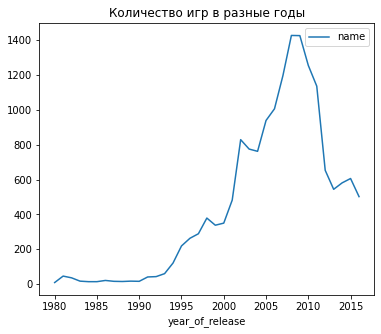

In [9]:
#смотрим, сколько игр выпускалось в разные годы
games.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(figsize = (6,5)).set_title('Количество игр в разные годы')
plt.show()                                                                          

Наблюдаем пик количества выпускаемых игр с 2006 по 2008 гг.

In [10]:
#динамика продаж по платформам
sales_platform = games.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
sales_platform.head(20)

total_sales
platform year_of_release             
2600     1980                   11.38
         1981                   35.68
         1982                   28.88
         1983                    5.84
         1984                    0.27
         1985                    0.45
         1986                    0.67
         1987                    1.94
         1988                    0.74
         1989                    0.63
3DO      1994                    0.02
         1995                    0.08
3DS      2011                   63.20
         2012                   51.36
         2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DC       1998                    3.38
         1999                    5.16

In [11]:
#платформы с наибольшими суммарными продажами
top_platform = games.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending = False)
sales_platform = top_platform.head()
display(sales_platform)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


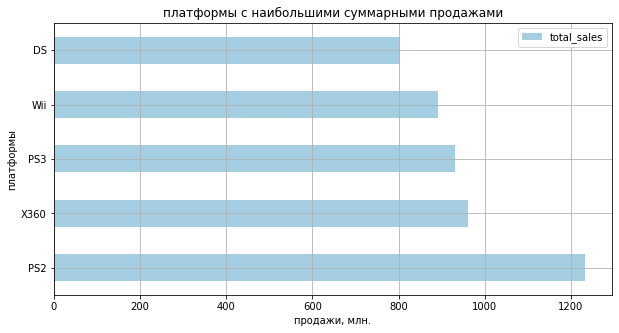

In [12]:
sales_platform.plot(kind='barh', grid = True, figsize = (10,5), colormap = 'Paired')
plt.title('платформы с наибольшими суммарными продажами')
plt.xlabel('продажи, млн.')
plt.ylabel('платформы')
plt.show()

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡</b> 

Это также можно визуализировать - в виде столбчатой диаграмы.

Выделяем топ-5 платформ по продажам: PS2, X360, PS3, Wii, DS.

In [13]:
sales_platform.index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')

(1999.0, 2017.0)

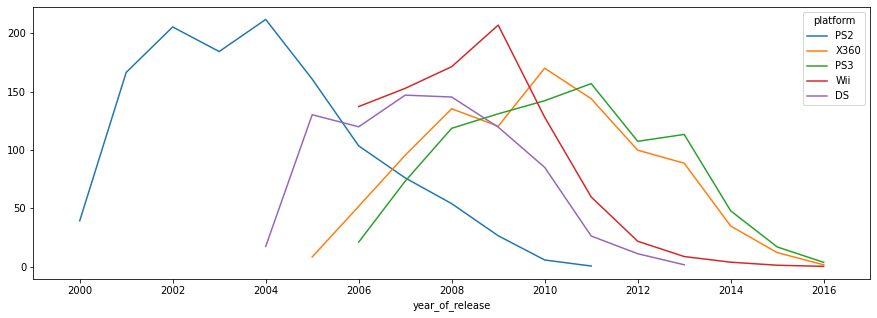

In [14]:
#построим распределение топ-5  платформ по годам
#посмотрим за какой характерный срок появляются новые и исчезают старые платформы
top_platform_years = games.pivot_table(index='year_of_release', columns ='platform', values = 'total_sales', aggfunc='sum')
top_platform_years = top_platform_years[sales_platform.index].plot(figsize =(15,5))
plt.xlim([1999, 2017])


<div class="alert-warning"> 
<b>Комментарий ревьюера 💡</b> 
    
Тут стоило бы ограничить ось абсцисс - сделать так, чтобы она начиналась как минимум с 1995-2000, чтобы данные не были визуально смещены вправо.</div>

<div class="alert alert-block alert-info">
<b> так выглядит намного круче, спасибо)
</div>

Из графика мы видим, что рост продаж, достижение пика, снижение происходит за 10 лет.

Выбираем актуальный период - 3 года, с 2014 по 2016 гг., стоит учесть, что за 2016 год данные могут быть неполными.

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>
    
Ты выбираешь хороший временной промежуток!
    
Для целей прогнозирования продаж на следующий год даже в традиционных моделях бизнеса редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды.

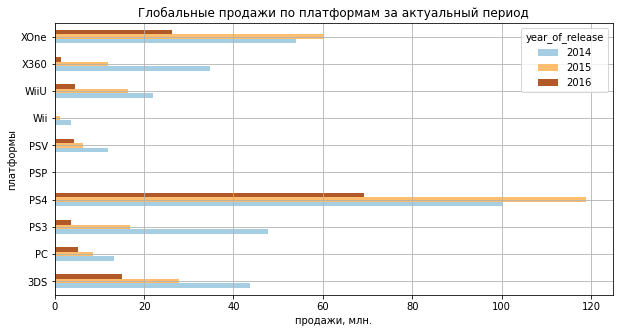

In [15]:
actual_games = games.query('year_of_release < 2017 and year_of_release > 2013').pivot_table(index = 'platform', columns = 'year_of_release',
                values = 'total_sales', aggfunc = 'sum')
actual_games.plot(kind='barh', grid = True, figsize = (10,5), colormap = 'Paired')
plt.title('Глобальные продажи по платформам за актуальный период')
plt.xlabel('продажи, млн.')
plt.ylabel('платформы')
plt.show()

***Какие платформы лидируют по продажам, растут или падают? Выбираем несколько потенциально прибыльных платформ.***
<br>
У нас две лидирущие и потенциально прибыльные платформы, это PS4 и XOne. PS4 была на пике продаж в 2015 году(около 119 млн.продаж), далее падение. XOne сорвала куш также в 2015 году(около 60 млн.продаж), затем падение.

In [16]:
actual_games = games.query('year_of_release < 2017 and year_of_release > 2013')

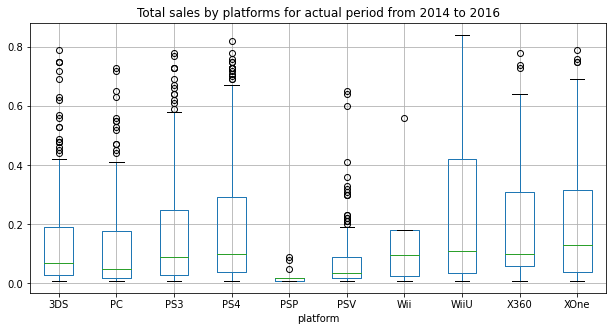

In [17]:
#«ящик с усами» по глобальным продажам игр в разбивке по платформам
actual_games.query('total_sales <0.85').boxplot(
    column='total_sales',
    by='platform',
    figsize=(10,5),
    patch_artist=False)
plt.suptitle("")
plt.title('Total sales by platforms for actual period from 2014 to 2016')
plt.show()

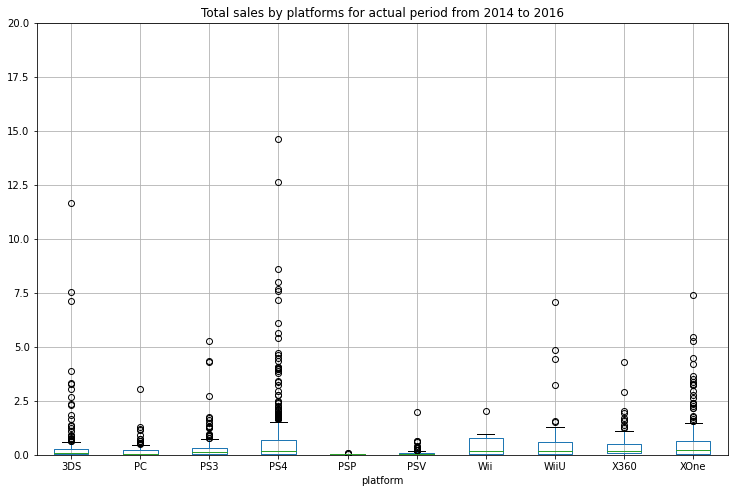

In [18]:
#чтобы посмотреть все выбросы, увеличим масштаб
actual_games.boxplot(
    column='total_sales',
    by='platform',
    figsize=(12, 8),
    patch_artist=False)
plt.ylim(0, 20)
plt.suptitle("")
plt.title('Total sales by platforms for actual period from 2014 to 2016')
plt.show()

У PS4 больше всего выбросов, скорее всего это связано с новыми релизами и обильными продажами.

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡</b> 
    
Стоит тут добавить ещё один "ящик с усами" - с другим ограничением на ось, чтобы можно было посмотреть и на выбросы.

Видим 5 лидирующих платформ PS3, PS4, X360, XOne и 3DS. В их ящиках довольно объёмный третий квартиль, который говорит нам о том, что платформы имеют успех на рынке, и пользователи с интересом тратят деньги на покупку игр.
Если брать в сравнение предыдущих лидеров PS4 и XOne, то у первой межквартильный размах выше, ее пользователи купили больше игр.
У двух других платформ X360 и XOne достаточно хорошая ситуация на рынке.
Медианы находятся практически на одном уровне у всех. Также у всех диаграмм имеются выбросы, которые не стоит убирать.

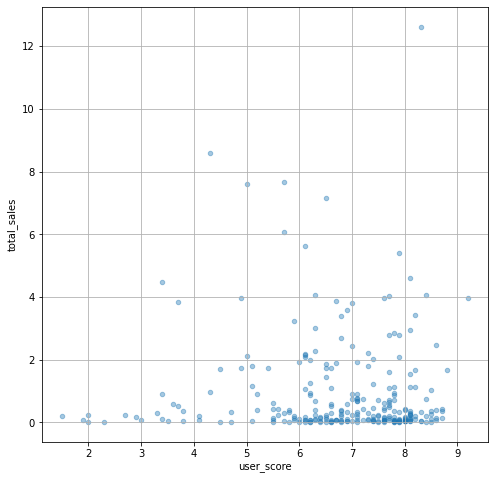

0.08798399271321647

In [19]:
#посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей 
games[games['platform'] == 'PS4'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.4, figsize=(8,8), grid=True)
plt.show()
games['user_score'].corr(games['total_sales'])

Продажи сосредоточены в диапозоне оценок от 6 до 8. Значение коэффициента корреляции Пирсона близко к 0, значит линейная связь слабая.

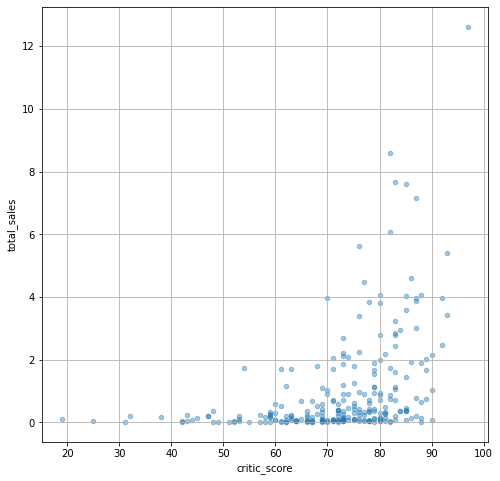

0.2453488454741138

In [20]:
#как влияют на продажи внутри одной популярной платформы отзывы критиков
games[games['platform'] == 'PS4'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.4, figsize=(8,8), grid=True)
plt.show()
games['critic_score'].corr(games['total_sales'])

Увеличение продаж сосредаточено в диапазоне оценок критика от 70 до 90. Значение коэффициента корреляции Пирсона близко к 0, значит линейная связь слабая.

***Проведем тот же анализ с другими платформами***

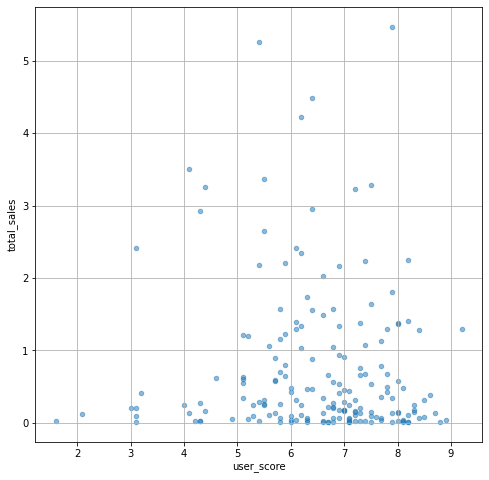

0.08798399271321647

In [21]:
games[games['platform'] == 'XOne'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(8,8), grid=True)
plt.show()
games['user_score'].corr(games['total_sales'])

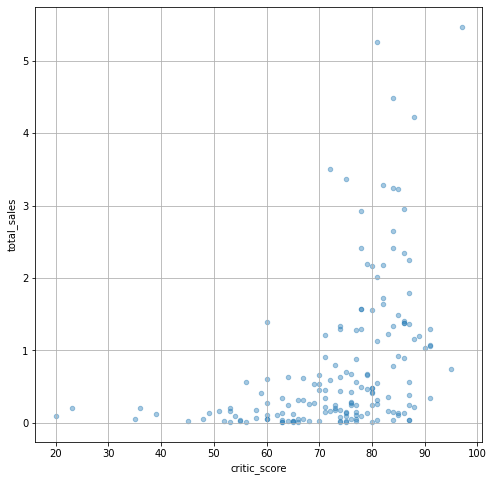

0.2453488454741138

In [22]:
games[games['platform'] == 'XOne'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.4, figsize=(8,8), grid=True)
plt.show()
games['critic_score'].corr(games['total_sales'])

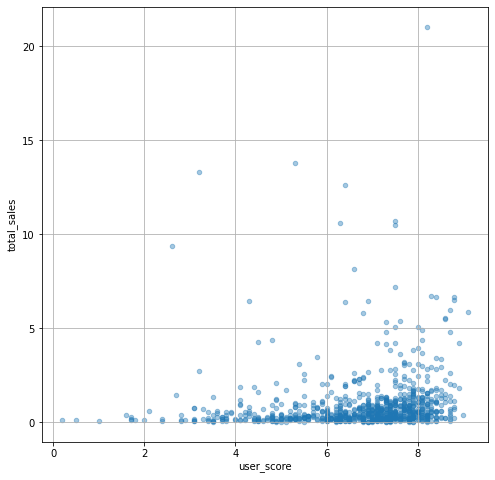

0.08798399271321647

In [23]:
games[games['platform'] == 'PS3'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.4, figsize=(8,8), grid=True)
plt.show()
games['user_score'].corr(games['total_sales'])

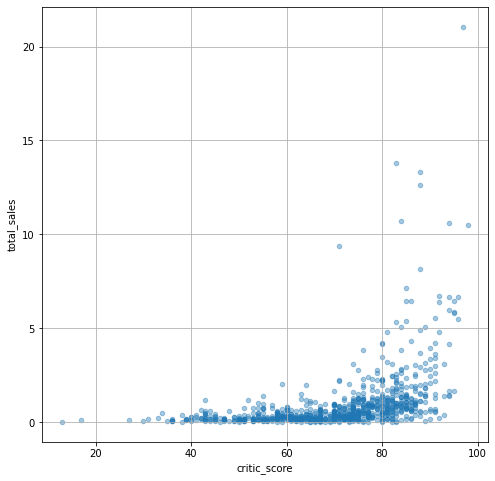

0.2453488454741138

In [24]:
games[games['platform'] == 'PS3'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.4, figsize=(8,8), grid=True)
plt.show()
games['critic_score'].corr(games['total_sales'])

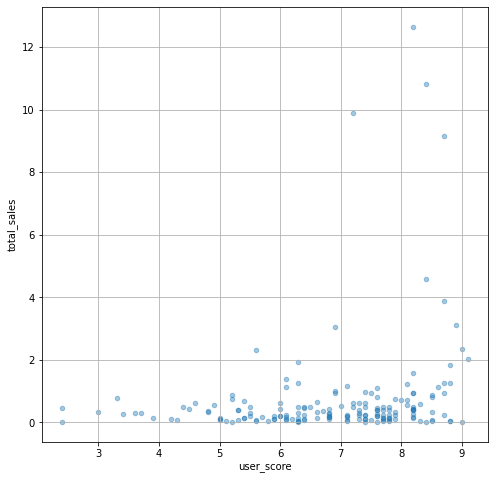

0.08798399271321647

In [25]:
games[games['platform'] == '3DS'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.4, figsize=(8,8), grid=True)
plt.show()
games['user_score'].corr(games['total_sales'])

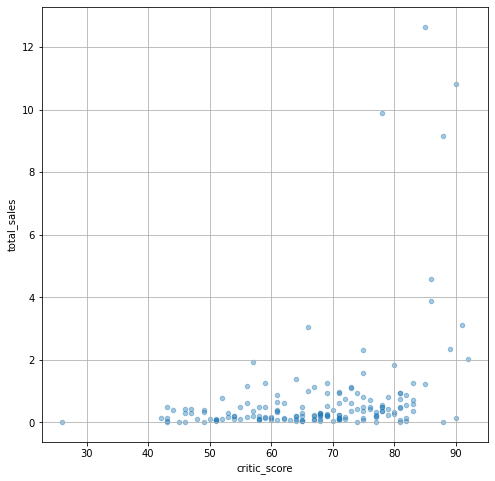

0.2453488454741138

In [26]:
games[games['platform'] == '3DS'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.4, figsize=(8,8), grid=True)
plt.show()
games['critic_score'].corr(games['total_sales'])

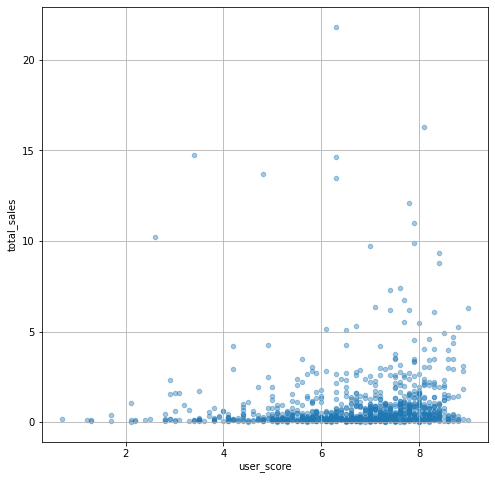

0.08798399271321647

In [27]:
games[games['platform'] == 'X360'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.4, figsize=(8,8), grid=True)
plt.show()
games['user_score'].corr(games['total_sales'])

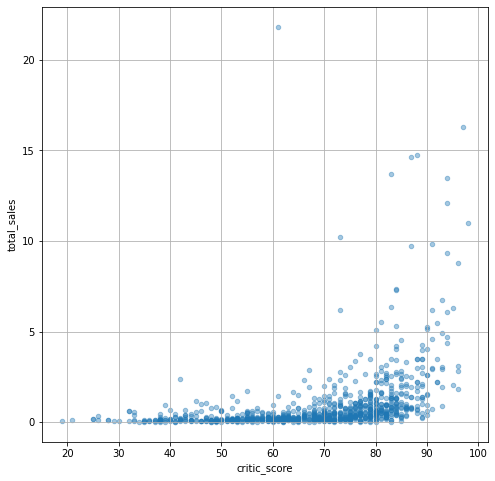

0.2453488454741138

In [28]:
games[games['platform'] == 'X360'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.4, figsize=(8,8), grid=True)
plt.show()
games['critic_score'].corr(games['total_sales'])

***ВЫВОД***
<br>
Коэффициент Пирсона имеет слабое значение по всем рассматриваемым платформам. Из диаграммы рассеивания мы можем заметить, что увеличение продаж происходит при оценке платформы выше средней. Стоит отметить, что на графике у платформ PS3 и X360 общие продажи выражены более четко в сравнении с Plastation 4.

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Согласен, результаты везде соответствуют примерно одному выводу. Отмечу, что здесь также удобным было воспользоваться инструментом циклов.

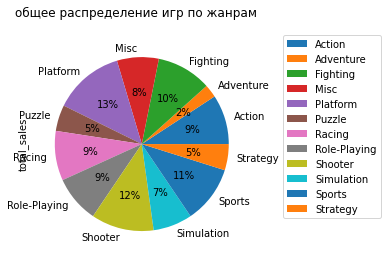

In [29]:
#посмотрим на общее распределение игр по жанрам
games.pivot_table(index='genre', values = 'total_sales', aggfunc='median').plot(kind = 'pie', subplots=True, autopct='%1.0f%%', title='общее распределение игр по жанрам')
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0)

Я сделала круговую диаграмму распределения игр по жанрам по медианным значениям. У нас получается, что больше всего пользователи покупают игры, которые принадлежат к таким жанрам, как Platform, Shooter, Sports, Fighting, Action. Игры принадлежащие к жанрам Misc, Simulation, Strategy, Puzzle, Adventure самые убыточные.

### Составляем портрет пользователя каждого региона

In [30]:
#в дальнейшем исследовании будем использовать данные только за актуальный период

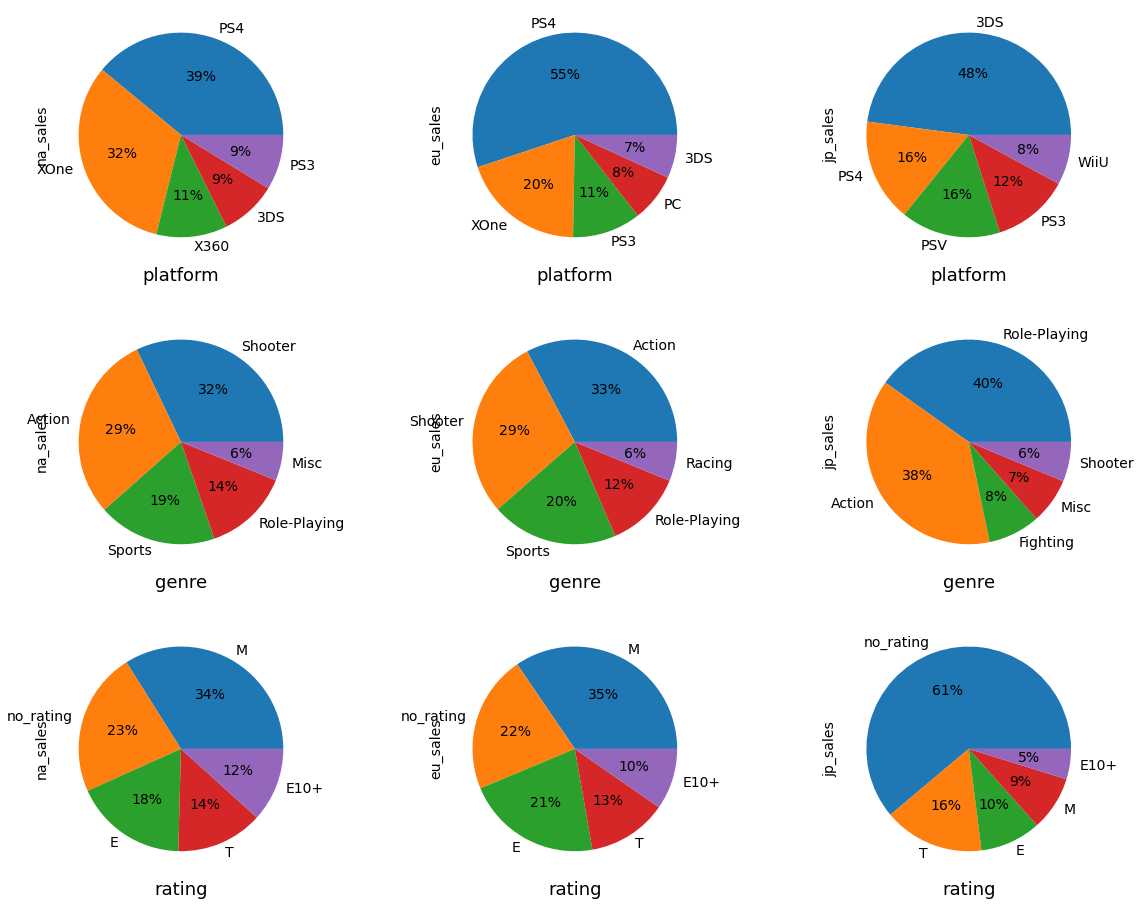

In [31]:
region = ['na_sales', 'eu_sales', 'jp_sales']
parametrs = ['platform', 'genre', 'rating']
plt.figure(figsize=(20,16))
plt.subplots_adjust(hspace=0.2)

serial_number = 1

for p in parametrs:
    for r in region:
        ax = plt.subplot(3,3,serial_number)
        plt.xlabel(p, fontsize=18)
        user_portait = actual_games.groupby(p).agg({r: 'sum'}).sort_values(by=r, ascending=False)[:5]
        user_portait.plot(kind='pie', ax=ax, label=p, fontsize=14,subplots=True, legend=False, autopct='%1.0f%%')
        plt.ylabel (r,fontsize = 14)
        serial_number += 1
    

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡</b> 
    
Отлично, что ты используешь метод subplots. Не забывай давать двухуровневый заголовок - общий и у каждого графика по отдельности.

1.В Америке популярные по продажам платформы PS4, XOne, X360. 
В Европе популярные по продажам платформы PS4, XOne, PS3. На втором месте американская игровая приставка XOne.
В Японии популярные по продажам платформы  3DS, PS4, PSV. Японская Nintendo 3DS имеет наибольшую долю продаж, далее Playstation. Я полагаю это связано с тем, что данные платформы были разработаны японскими компаниями, которые занимают большую долю рынка Японии, американцы не входят в топ-5 игровых платформ в Японии. Стоит отметить, что японские игровые приставки также лидируют как на американском, так и европейском рынках.
<br>
2.В Америке наибольшие продажи составляют игры принадлежащие жанрам Shooter, Action, Sports.
В Европе это Action, Shooter, Sports.
А в Японии первое место по продажам занимают игры принадлежащие жанру Role-Playing, на втором месте Action, далее Fighting.
Таким образом, во всех 3-х регионах предпочитаемые жанры Action и Sports.
<br>
3.В Америке и Европе категория рейтинга M, подходящая только тем, кто старше 17 лет, лидирует по продажам с долей 34% и 35% по сравнению с другими категориями. 23% пользователей в Америке и 22% в Европе не обращают внимание на рейтинг при покупке.
В Японии же основная доля покупателей 61% не обращает внимание на рейтинг при покупке. На втором месте продажи по категории Т, этот рейтинг подходит для игроков 13 лет и старше. 

### Проверяем гипотезы

In [32]:
#Находим средние пользоваельские рейтинги и проверяем нулевую гипотезу 
#Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
#Aльтернативня гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC разные.
#Уровень значимости устанавливаем, опираясь на готовность поймать различия там, где их нет.

In [33]:
xboxone = actual_games[(actual_games['platform'] =='XOne') & (actual_games['user_score'] > 0)]['user_score']
pc = actual_games[(actual_games['platform'] =='PC') & (actual_games['user_score'] > 0)]['user_score']
print('Средний рейтинг Xbox One:', xboxone.mean())
print('Средний рейтинг PC:', pc.mean())
alpha = 0.05
results = st.ttest_ind(pc, xboxone)
           
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний рейтинг Xbox One: 6.594545454545456
Средний рейтинг PC: 6.298360655737705
0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Мы сравниваем средние двух генеральных совокупностей ttest-ом, так как выборочные средние нормально распределены.
<br>
При условии, что нулевая гипотеза равна, вероятность случайно получить различие равно 10%, средние рейтинги по разным платформам не одинаковы, но и значимого различия между ними нет.

In [34]:
#Находим средние пользоваельские рейтинги и проверяем нулевую гипотезу 
#Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports одинаковые.
#Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action и Sports разные.

In [35]:
action = actual_games[(actual_games['genre'] =='Action') & (actual_games['user_score'] > 0)]['user_score']
sports = actual_games[(actual_games['genre'] =='Sports') & (actual_games['user_score'] > 0)]['user_score']
print('Средний рейтинг Action:', action.mean())
print('Средний рейтинг Sports:', sports.mean())
alpha = 0.01
results = st.ttest_ind(action, sports)
           
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний рейтинг Action: 6.760606060606061
Средний рейтинг Sports: 5.2251968503937
2.8711147985105864e-19
Отвергаем нулевую гипотезу


P-value больше, чем критический уровень статистической значимости.
Средние рейтинги по разным жанрам не одинаковы, между ними есть значимое различие.

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Гипотезы сформулированы верно. С выводами согласен. 

### Общий вывод

Таким образом, какой прогноз мы можем сделать на 2017 год по итогам исследовательского анализа данных:
<br>

- глобальные продажи по платформам за актуальный период(2014-2016 гг.) были у двух игровых приставок - PS4 и XOne;
<br>
- самая популярная игровая платформа по регионам - PS4;
<br>
- наиболее популярные продаваемые жанры Shooter, Action по Америке и Европе и Role_Playing в Японии;
<br>
- в топ рейтинг от организации ESRB входит возрастная категория "М".
<br>

Итогом проверки двух гипотез, стал вывод о том, что средние пользовательские рейтинги платформ близки к одинаковым, и средние пользовательские рейтинги по жанрам разные.
<br>
<br>
Поэтому прогноз на 2017 год делаем на приставку PS4 и жанры Shooter, Action, Role_Playing. И стоит учесть, что возврастная категория "M" пользуется спросом на рынке.

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>
    
Объемный, качественно написанный вывод! Всё отражено верно.

<div class=> 
<b>Общий комментарий ревьюера </b> 
    
Отличный проект, тобою проделана большая работа, ты молодец!

Хвалю за наличие хороших промежуточных (и общего) выводов, комментариев и рассуждений - твой проект интересно проверять. Также очень хорошее оформление проекта (в том числе наличие вступления). Сделано все именно так, как требуется. По коду вопросов тоже нет.

Что обязательно стоит изменить: 
    
1. Добавить объяснение причин пропусков
2. Добавить проверку на дублиткаты.

Также, я оставил некоторое количество желтых комментариев. Думаю, они будут полезны и ты также что-либо поменяешь, потому что это сделает твой проект лучше.

Буду ждать доработок :)
    
Удачи!

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 Вторая итерация</b>

Все, что я отмечал, исправлено. У тебя получился качественно сделанный проект, а теперь он стал ещё лучше. Принимаю! 
    
Успехов в дальнейшей учебе!